# Feature engineering approach
A human engineer usually uses 3 types of insights: intuition, expert domain knowledge and statistical analysis.  Example of intuitions include knowing how fraudsters behave - craft features that indicate such behaviour and confirmed by statistical analysis.
**Data trap** - Predictive features may only exist in the dataset being investigated.  To avoid data trap, it is important to establish a **qualitative rationale** as to why this statistical predictive feature exists and should exists outside the dataset as well.  Data trap is the human form of overfitting and finding patterns in noise.


In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

%run utils.ipynb

df = testimon_fraud()

## 1. Feature from intuition - fradusters don't sleep
In most cases, genuine transactions happen during the day as people sleep at night

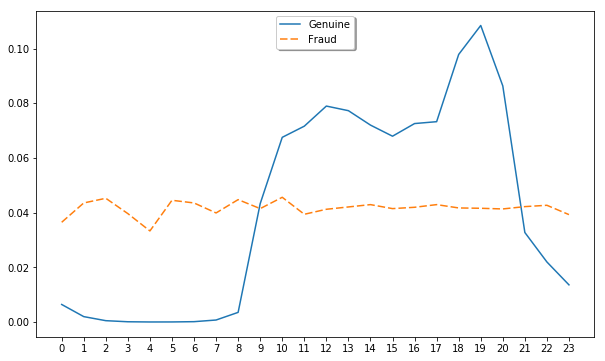

In [16]:
df['hour'] = df['step'] % 24
frauds = []
genuine = []
for i in range(24):
    f = len(df[(df['hour'] == i) & (df['isFraud'] == 1)])
    g = len(df[(df['hour'] == i) & (df['isFraud'] == 0)])
    frauds.append(f)
    genuine.append(g)

fig, ax = plt.subplots(figsize=(10,6)) 
ax.plot(genuine/np.sum(genuine), label='Genuine') 
ax.plot(frauds/np.sum(frauds),dashes=[5, 2], label='Fraud') 
plt.xticks(np.arange(24))
legend = ax.legend(loc='upper center', shadow=True)

# As seen below, there are less Genuine transactions at night, 
# while fraudulent behavior continues over the day

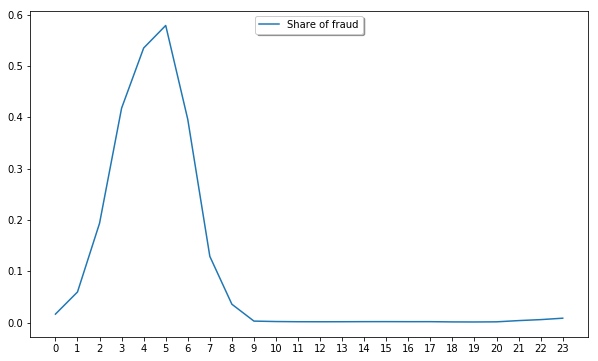

In [17]:
# What is the share of frauds over for each hour of the day?
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.divide(frauds,np.add(genuine,frauds)), label='Share of fraud')
plt.xticks(np.arange(24))
legend = ax.legend(loc='upper center', shadow=True)

# As seen below, around 60% of transactions happens at 5 am.


## 2. Expert insight - Fraudulent transaction usually involves a transfer then a cash out
First, fraudsters transfer money to a bank account they control, then they cash out from the ATM.

In [18]:
# Determine whether any destination of a fraudlent TRANSFER 
# matches the origin of a fraudlent CASH OUT

dfFraudTransfer = df[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashOut = df[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
dfFraudTransfer.nameDest.isin(dfFraudCashOut.nameOrig).any()

# The results of False confirms this insight is not applicable 

False